<a href="https://colab.research.google.com/github/FelipeOLCunha/Customer-Lifetime-Value/blob/main/%5BPROJECT%5D_Customer_Order_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics

%matplotlib inline
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

Visualizing the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/orders.csv')
df

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70
1,7574,SILVER,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95
2,28861,Gold,01-Jan-17,04-Jan-17,123000871,230100500068,1,1.7,0.80
3,43796,Gold,01-Jan-17,06-Jan-17,123002851,220100100633,1,47.9,24.05
4,54673,Gold,01-Jan-17,04-Jan-17,123003607,220200200043,1,36.9,18.30
...,...,...,...,...,...,...,...,...,...
185008,92467,SILVER,31-Dec-21,31-Dec-21,124433239,240100200001,4,64.0,6.35
185009,92866,Silver,31-Dec-21,31-Dec-21,124436561,230100500058,1,16.7,7.25
185010,92894,Silver,31-Dec-21,31-Dec-21,124434316,220200100035,5,313.0,31.40
185011,93239,Gold,31-Dec-21,02-Jan-22,124436170,220200200047,2,271.6,68.00


In [ ]:
dfProd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/product-supplier.csv')
dfProd

,Product ID,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID
0,210100100001,Children,Children Outdoors,"Outdoor things, Kids",Boy's and Girl's Ski Pants with Braces,NO,Scandinavian Clothing A/S,50
1,210100100002,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket,ES,Luna sastreria S.A.,4742
2,210100100003,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket Sidney,NO,Scandinavian Clothing A/S,50
3,210100100004,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Set,NO,Scandinavian Clothing A/S,50
4,210100100005,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Suit,NO,Scandinavian Clothing A/S,50
...,...,...,...,...,...,...,...,...
5499,240800200061,Sports,Winter Sports,Winter Sports,Top Equipe 00 White,US,Twain Inc,13198
5500,240800200062,Sports,Winter Sports,Winter Sports,Top Equipe 07 Green,US,Twain Inc,13198
5501,240800200063,Sports,Winter Sports,Winter Sports,Top Equipe 99 Black,US,Twain Inc,13198
5502,240800200064,Sports,Winter Sports,Winter Sports,Alpine Ski Bag 2-pair Black/Yellow,FR,Massif S.A.,13199


# Data Cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185013 entries, 0 to 185012
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Customer ID                        185013 non-null  int64         
 1   Customer Status                    185013 non-null  object        
 2   Date Order was placed              185013 non-null  datetime64[ns]
 3   Delivery Date                      185013 non-null  datetime64[ns]
 4   Order ID                           185013 non-null  int64         
 5   Product ID                         185013 non-null  int64         
 6   Quantity Ordered                   185013 non-null  int64         
 7   Total Retail Price for This Order  185013 non-null  float64       
 8   Cost Price Per Unit                185013 non-null  float64       
 9   Item Retail Value                  185013 non-null  float64       
dtypes: datetime64[ns](2)

In [ ]:
df.isna().sum()

Customer ID                          0
Customer Status                      0
Date Order was placed                0
Delivery Date                        0
Order ID                             0
Product ID                           0
Quantity Ordered                     0
Total Retail Price for This Order    0
Cost Price Per Unit                  0
Item Retail Value                    0
dtype: int64

In [ ]:
df.isnull().sum()

Customer ID                          0
Customer Status                      0
Date Order was placed                0
Delivery Date                        0
Order ID                             0
Product ID                           0
Quantity Ordered                     0
Total Retail Price for This Order    0
Cost Price Per Unit                  0
Item Retail Value                    0
dtype: int64

In [ ]:
#Correcting the date
df['Date Order was placed'] = pd.to_datetime(df['Date Order was placed'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

In [ ]:
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Item Retail Value
0,579,Silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70,46.3
1,7574,Silver,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95,21.7
2,28861,Gold,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80,1.7
3,43796,Gold,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05,47.9
4,54673,Gold,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30,36.9


In [ ]:
df['Customer Status'].unique()

array(['Silver', 'Gold', 'Platinum'], dtype=object)

In [ ]:
#Correcting the differents ways that the customer status were written
df['Customer Status'] = df['Customer Status'].str.capitalize()

In [ ]:
df['Customer Status'].unique()

array(['Silver', 'Gold', 'Platinum'], dtype=object)

In [ ]:
df['Customer Status'] = df['Customer Status'].astype(str)

In [ ]:
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Item Retail Value
0,579,Silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70,46.3
1,7574,Silver,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95,21.7
2,28861,Gold,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80,1.7
3,43796,Gold,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05,47.9
4,54673,Gold,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30,36.9


In [ ]:
#Creating a new column named "Item Retail Value"
df['Item Retail Value'] = df['Total Retail Price for This Order']/df['Quantity Ordered']

In [ ]:
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Item Retail Value
0,579,Silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70,46.3
1,7574,Silver,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95,21.7
2,28861,Gold,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80,1.7
3,43796,Gold,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05,47.9
4,54673,Gold,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30,36.9


In [ ]:
dfAvg = df.groupby('Product ID')[['Cost Price Per Unit','Item Retail Value']].mean()
dfAvg.head()

,Cost Price Per Unit,Item Retail Value
Product ID,,
210200100001,5.650,12.80
210200100003,15.585,34.87
210200100004,16.150,36.30
210200100005,5.750,13.00
210200100006,5.150,11.60


In [ ]:
#Creating an Index and the column "N Rows"
counts = df.groupby('Product ID')
dfAvg = counts.size().to_frame(name='N Rows')
dfAvg = dfAvg.join(counts.agg(
    {'Cost Price Per Unit': 'mean'}).rename(columns={'Cost Price Per Unit': 'Cost Price Per Unit mean'})).join(counts.agg(
        {'Item Retail Value': 'mean'}).rename(columns={'Item Retail Value': 'Item Retail Value mean'})).reset_index()
dfAvg

,Product ID,N Rows,Cost Price Per Unit mean,Item Retail Value mean
0,210200100001,56,5.650000,12.800000
1,210200100003,60,15.585000,34.870000
2,210200100004,95,16.150000,36.300000
3,210200100005,227,5.750000,13.000000
4,210200100006,16,5.150000,11.600000
...,...,...,...,...
3119,240800200059,112,19.037054,42.167857
3120,240800200062,108,16.572222,36.385185
3121,240800200063,49,18.427551,40.459184
3122,240800200064,32,16.826562,42.050000


In [ ]:
summary = pd.merge(dfAvg, dfProd, on='Product ID', how='inner')
summary.head()

,Product ID,N Rows,Cost Price Per Unit mean,Item Retail Value mean,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID
0,210200100001,56,5.650,12.80,Children,Children Sports,"A-Team, Kids",A-team Children's Shorts w/Pockets,US,A Team Sports,3298
1,210200100003,60,15.585,34.87,Children,Children Sports,"A-Team, Kids",A-team Children's Sweat R.Neck Big Logo,US,A Team Sports,3298
2,210200100004,95,16.150,36.30,Children,Children Sports,"A-Team, Kids","A-team Children's Sweat w/Hood,Big Logo",US,A Team Sports,3298
3,210200100005,227,5.750,13.00,Children,Children Sports,"A-Team, Kids",A-team Children's T-Shirt,US,A Team Sports,3298
4,210200100006,16,5.150,11.60,Children,Children Sports,"A-Team, Kids",A-team Children's T-Shirt w/Big Logo,US,A Team Sports,3298


In [ ]:
summary = summary.drop(columns=['Product Line', 'Product Group', 'Supplier Country', 'Supplier Name', 'Supplier ID'])
summary = summary.rename(columns={'N Rows': 'Total Sold', 'Cost Price Per Unit mean': 'Wholesale Price', 'Item Retail Value mean': 'Retail Price'})

In [ ]:
summary

,Product ID,Total Sold,Wholesale Price,Retail Price,Product Category,Product Name
0,210200100001,56,5.650000,12.800000,Children Sports,A-team Children's Shorts w/Pockets
1,210200100003,60,15.585000,34.870000,Children Sports,A-team Children's Sweat R.Neck Big Logo
2,210200100004,95,16.150000,36.300000,Children Sports,"A-team Children's Sweat w/Hood,Big Logo"
3,210200100005,227,5.750000,13.000000,Children Sports,A-team Children's T-Shirt
4,210200100006,16,5.150000,11.600000,Children Sports,A-team Children's T-Shirt w/Big Logo
...,...,...,...,...,...,...
3119,240800200059,112,19.037054,42.167857,Winter Sports,"South Vally Iii,Royal"
3120,240800200062,108,16.572222,36.385185,Winter Sports,Top Equipe 07 Green
3121,240800200063,49,18.427551,40.459184,Winter Sports,Top Equipe 99 Black
3122,240800200064,32,16.826562,42.050000,Winter Sports,Alpine Ski Bag 2-pair Black/Yellow


# Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

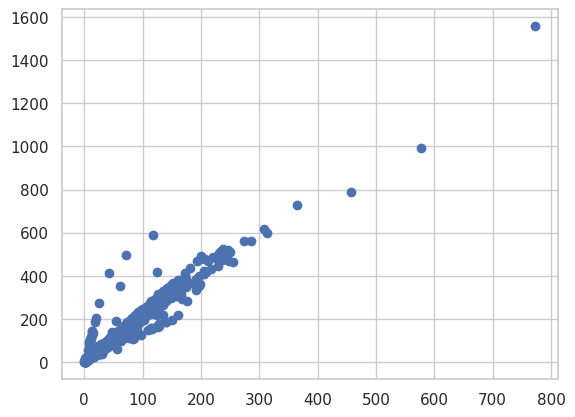

In [ ]:
plt.scatter(summary['Wholesale Price'], summary['Retail Price'])
plt.show


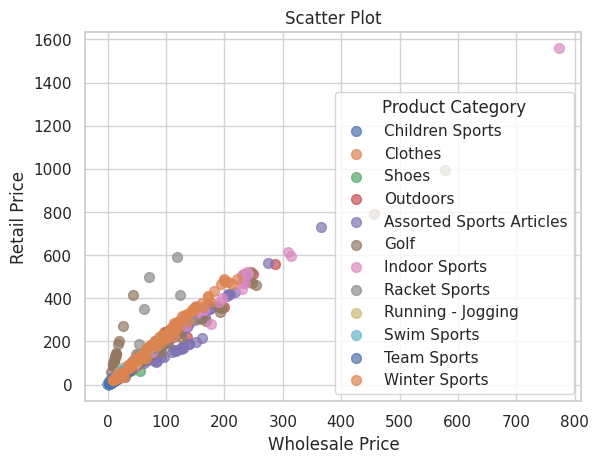

In [ ]:
# Create a scatter plot

data = summary

# Customize the scatter plot
for category in data["Product Category"].unique():
    subset = data[data["Product Category"] == category]
    plt.scatter(
        subset["Wholesale Price"],
        subset["Retail Price"],
        label=category,
        s=50,
        alpha=0.7
    )

# Customize appearance
plt.grid(True, color='lightgrey')
plt.gca().set_facecolor('white')

#Add labels to the axes
plt.xlabel('Wholesale Price')
plt.ylabel('Retail Price')

# Add a legend
plt.legend(title="Product Category")

# Show the plot
plt.title('Scatter Plot')
plt.show()